In [1]:
# import library

from __future__ import print_function
import numpy as np
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split # for splitting data
from sklearn.metrics import accuracy_score # for evaluating results 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

c:\Users\ACER\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [15]:
# set random seed for Numpy random generators ( canreplace with any of 32 bit numbers)
np.random.seed(7)


# take existed dataset inside sklearn
# classification task in ML ( take iris datasets to classify the data into categories)
iris = datasets.load_iris()

# predictor inputs in ML ( take iris datasets to predict) 
iris_X = iris.data

# indicate predictor variable ouput
iris_y = iris.target

# printout unique label presented in array
print("Labels:", np.unique(iris_y))

# Train-test split is a tool used to evaluate a machine learning model’s ability to predict a certain outcome accurately when exposed to real-world data it’s never seen before
# split train and test
# X_train 
X_train, X_test, y_train, y_test = train_test_split(iris_X, iris_y, test_size=130)  # 130 samples will be used to testing
print("Train size:", X_train.shape[0], ", test size:", X_test.shape[0])

Labels: [0 1 2]
Train size: 20 , test size: 130


In [38]:
# creates an instance of the k-nearest neighbors classifier from the scikit-learn library. The parameter n_neighbors is set to 1, which means the classifier will use the nearest neighbor to make predictions.
# The parameter p is set to 2, indicating that the Euclidean distance metric will be used for computing distances between data points.
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2)

# This line fits (trains) the k-nearest neighbors classifier using the training data.
#  The X_train variable contains the training features (attribute values), and y_train contains the corresponding training labels (species in this case). 
# The model will use this data to learn the relationships between features and labels.
model.fit(X_train, y_train)

# uses the trained k-nearest neighbors classifier to predict the labels for the test data (X_test
y_pred = model.predict(X_test)

#  The accuracy_score function from scikit-learn is used to compare the predicted labels (y_pred) with the actual labels (y_test) and calculate the accuracy. 
print("Accuracy of 1NN: %.2f %%" %(100*accuracy_score(y_test, y_pred)))

# 1NN rất dễ gây ra hiện tượng overfitting. Để giảm thiểu việc này, ta có thể tăng lượng điểm lân cận lên,

Accuracy of 1NN: 93.85 %


In [39]:

# added weights = ’distance’
# (Giá trị mặc định của weights là ’uniform’, tương ứng với việc coi tất cả các điểm lân cận có giá trị như nhau như ở trên).
model = neighbors.KNeighborsClassifier(n_neighbors = 7, p = 2, weights = "distance")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy of 7NN (1/distance weights): ",(100*accuracy_score(y_test,y_pred)))

Accuracy of 7NN (1/distance weights):  94.61538461538461


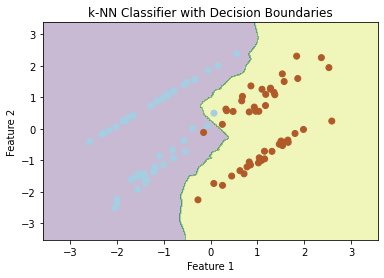

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data
X, y = make_classification(n_samples=100, n_features=2, n_informative=2, n_redundant=0, random_state=42)

# Fit a k-NN classifier with k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Create a meshgrid to plot decision boundaries
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Make predictions on the meshgrid points
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundaries and data points
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('k-NN Classifier with Decision Boundaries')
plt.show()
